# Italian Restaurant for Bangalore - Week 2

## 1. Introduction / Business Problem

<b>Audience:</b> My audience is a reputed Hotel group based out of Italy.<br>
<br>
The Italian Hotel Group is currently considering opening an Italian Restaurant in Bangalore, KA, India.  The group wants to find out suitable locations in Bangalore for establishing the restaurant.  It also wants to find out nearby restaurants that may offer competition to them with respect to Italian cuisine. In addition, the group would like to know the strengths of their main local competitor.

## 2. Data Section

I will be using two sources for the data:<br>
<br>
<b>1. Zomato:</b> Data obtained from Indian multinational restaurant aggregator and food delivery company Zomato.  Since Zomato has restricted API access recently, I will be using Zomato.csv obtained from the following link ‘https://www.kaggle.com/shrutimehta/zomato-restaurants-data?select=zomato.csv’.  This data would be used to identify top locations with restaurants within Bangalore.  We will also utilize K-Means clustering to plot the restaurant clusters.  Further, the top locations would be analyzed using bar plots and wordcloud to identify the location best suited for establishing Italian Restaurant and the current best Italian restaurant in the locality.<br>
<br>
<b>2. Foursquare:</b> Next, I will be using Foursquare data to identify the reasons why the current best Italian restaurant in the locality is best known for.  Some analysis will also be done on the Top tip contributor to further validate his/her credentials.  The Foursquare location data will also be used to identify any other competition in terms of Italian cuisine and plotted on a map using Folium.

## 3. Methodology Section

### 3.a Importing necessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analysis

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

#Import wordcloud for generating wordclouds
from wordcloud import WordCloud, STOPWORDS

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML

print('Libraries imported.')


Libraries imported.


In [2]:
#Setting desired values for Pandas dataframe settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#Format column width and display all tips
pd.set_option('display.max_colwidth', -1)

### 3.b Importing data from Zomato

In [3]:
df = pd.read_csv('D:\Trainings\Coursera\IBM Datascience\Capstone\Zomato.csv', encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### 3.c Studying Data from Zomato

In [4]:
df.shape

(9551, 21)

The Zomato database has 9551 rows and 21 columns

### 3.d Separating rows having City column as Bangalore as separate Table

In [6]:
Bangalore = df[(df.City == 'Bangalore')]
Bangalore.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
726,50943,Sultans of Spice,1,Bangalore,"BluPetal Hotel, 60 Jyoti Nivas College Road, Koramangala 5th Block, Bangalore","BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,"North Indian, Mughlai",1300,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.1,Green,Very Good,2416
727,58268,The Fatty Bao - Asian Gastro Bar,1,Bangalore,"610, 3rd Floor, 12th Main, Off 80 Feet Road, Indiranagar, Bangalore",Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,Asian,2400,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.7,Dark Green,Excellent,2369
728,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Indiranagar, Bangalore",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",2000,Indian Rupees(Rs.),No,No,No,No,4,4.8,Dark Green,Excellent,10934
729,18162866,Three Dots & A Dash,1,Bangalore,"840/1,100 Feet Road, Metro Pillar 56-57, Indiranagar, Bangalore",Indiranagar,"Indiranagar, Bangalore",77.640489,12.980410,"European, Continental",1300,Indian Rupees(Rs.),Yes,No,No,No,3,3.9,Yellow,Good,1354
730,18407918,Bombay Brasserie,1,Bangalore,"2989/B, 12th Main Road, HAL 2nd Stage, Indiranagar, Bangalore",Indiranagar,"Indiranagar, Bangalore",77.645748,12.970324,Modern Indian,1500,Indian Rupees(Rs.),No,Yes,No,No,3,4.2,Green,Very Good,231


In [15]:
Bangalore.shape

(20, 21)

It is observed that Bangalore table has a total of 20 rows and 21 columns.

In [11]:
## 3.e Studying the Bangalore Table
Bangalore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 726 to 745
Data columns (total 21 columns):
Restaurant ID           20 non-null int64
Restaurant Name         20 non-null object
Country Code            20 non-null int64
City                    20 non-null object
Address                 20 non-null object
Locality                20 non-null object
Locality Verbose        20 non-null object
Longitude               20 non-null float64
Latitude                20 non-null float64
Cuisines                20 non-null object
Average Cost for two    20 non-null int64
Currency                20 non-null object
Has Table booking       20 non-null object
Has Online delivery     20 non-null object
Is delivering now       20 non-null object
Switch to order menu    20 non-null object
Price range             20 non-null int64
Aggregate rating        20 non-null float64
Rating color            20 non-null object
Rating text             20 non-null object
Votes                   20 non-null

In [12]:
Bangalore.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,2.000000e+01,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.103172e+07,1.0,77.634406,12.955034,1232.500000,2.700000,4.375000,2805.750000
std,9.195709e+06,0.0,0.034330,0.030427,509.456625,0.732695,0.280741,3226.050541
min,5.094300e+04,1.0,77.570997,12.906229,400.000000,1.000000,3.900000,231.000000
25%,5.657950e+04,1.0,77.614252,12.933959,800.000000,2.000000,4.175000,721.500000
50%,1.826360e+07,1.0,77.633244,12.960077,1300.000000,3.000000,4.400000,1321.000000
75%,1.837135e+07,1.0,77.645484,12.976146,1500.000000,3.000000,4.600000,3996.000000
max,1.843963e+07,1.0,77.699386,13.029198,2400.000000,4.000000,4.800000,10934.000000


In [13]:
## Checking if dataset contains any null

nan_values = Bangalore.isna()
nan_columns = nan_values.any()

columns_with_nan = Bangalore.columns[nan_columns].tolist()
print(columns_with_nan)

[]


There are no null values noted in the Bangalore dataframe.

### 3.e Analysis of Restaurants in Bangalore 

#### 3.e.1.a Number of Restaurant by Localities in Bangalore

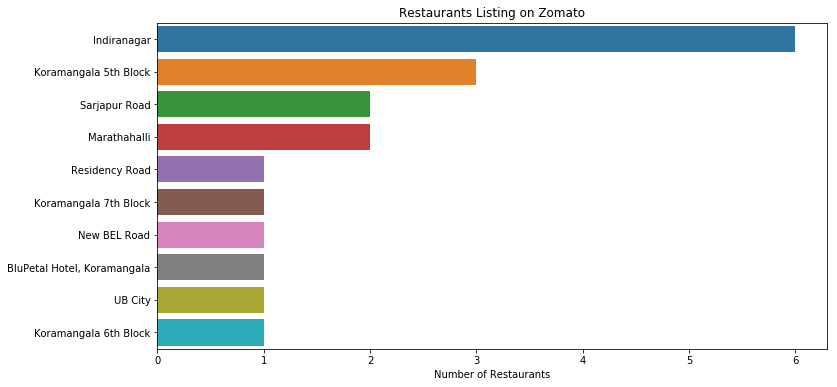

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x=Bangalore.Locality.value_counts().head(10), y=Bangalore.Locality.value_counts().head(10).index)

plt.ylabel(None);
plt.xlabel('Number of Restaurants')
plt.title('Restaurants Listing on Zomato');

It is observed in the above analysis that Indiranagar has 6 restaurants followed by Koramangala 5th Block with 3, and then Sajapur Road and Marathahalli coming a joint third with 2 restaurants each.

#### 3.e.2 Frequency of Bangalore restaurants by Ratings

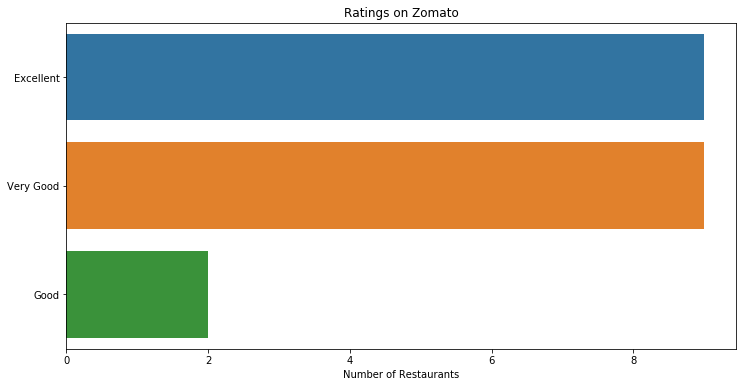

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x=Bangalore['Rating text'].value_counts().head(3), y=Bangalore['Rating text'].value_counts().head(3).index)

plt.ylabel(None);
plt.xlabel('Number of Restaurants')
plt.title('Ratings on Zomato');

Nine restaurants have an Excellent Rating.<br>
Nine restaurants have a Very Good Rating.<br>
Two restaurants have a Good rating.

#### 3.e.3 Average Cost for Two by Locality

In [29]:
grouped = Bangalore.groupby(['Locality'])['Average Cost for two'].mean().reset_index()
grouped = grouped.sort_values('Average Cost for two', ascending=False)
grouped = grouped[['Locality','Average Cost for two']].reset_index()
grouped = grouped[['Locality','Average Cost for two']]
grouped

,Locality,Average Cost for two
0,Sarjapur Road,1600.000000
1,Koramangala 7th Block,1500.000000
2,UB City,1500.000000
3,Indiranagar,1433.333333
4,"BluPetal Hotel, Koramangala",1300.000000
5,Marathahalli,1300.000000
6,Residency Road,1200.000000
7,Koramangala 5th Block,1050.000000
8,JP Nagar,600.000000
9,New BEL Road,600.000000


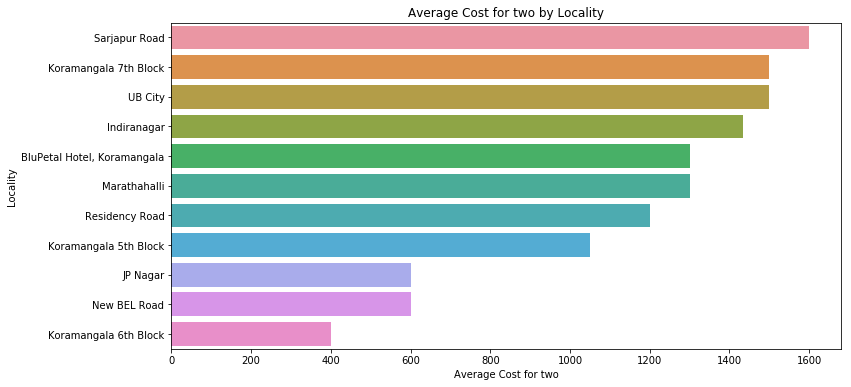

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x=grouped['Average Cost for two'], y=grouped['Locality'])

plt.ylabel('Locality');
plt.xlabel('Average Cost for two')
plt.title('Average Cost for two by Locality');

As can be seen in the above two analysis, Sarjpur Road has the costliest Average Cost for Two, followed by Koramangala 7th Block and UB City; however, as seen in section 3.e.1, the above 3 locations have hardly 1 or 2 restaurants. Whereas Indiranagar locality which had 6 restaurants stands at a commendable 4th position. Hence, I would state that Indiranagar location is clearly a foodie's delight and customers appear to be okay to pay a premium of the overall food experience.<br>
<br>
I will now have to check if Indiranagar locality prefers Italian cuisine.


#### 3.e.4 Plotting WordCloud for Indiranagar Locality

In [35]:
## Fetching the resturants having 'Excellent' and 'Very Good' rating
Indiranagar = Bangalore[(Bangalore.Locality.isin(['Indiranagar'])) & (Bangalore['Rating text'].isin(['Excellent','Very Good']))]

Indiranagar = Indiranagar.Cuisines.value_counts().reset_index()

## Extracting all the cuisines in a single list
cuisine = []
for x in Indiranagar['index']: 
  cuisine.append(x)

# cuisine = '[%s]'%', '.join(map(str, cuisien))
cuisine

['Asian',
 'Bakery, Desserts, Cafe',
 'Pizza, Cafe, Italian',
 'Modern Indian',
 'Italian, American, Pizza']

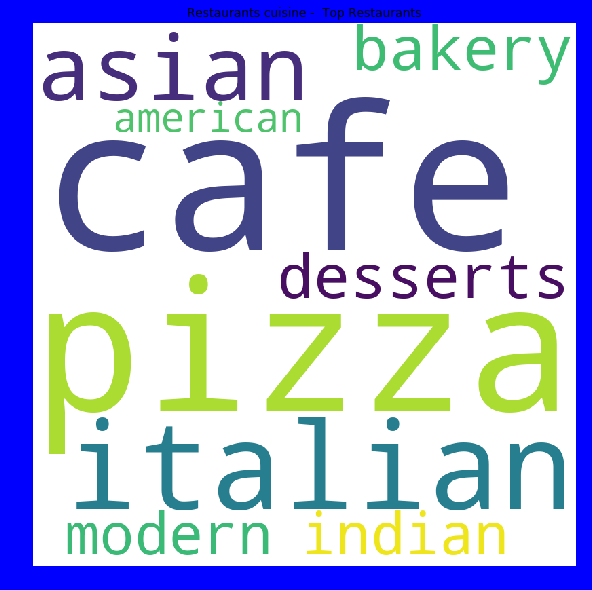

In [38]:
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in cuisine:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = 'b', edgecolor='g')
plt.title('Restaurants cuisine -  Top Restaurants')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

It can be seen in the above wordcloud that Pizza, italian are standing out.  So clearly the customers of Indiranagar have a palate for Italian cuisine.<br>
<br>
Now lets explore Indiranagar locality a bit further.

#### 3.e.5 Exploring market for Italian cuisine in Indiranagar

In [39]:
Indiranagar

,index,Cuisines
0,Asian,1
1,"Bakery, Desserts, Cafe",1
2,"Pizza, Cafe, Italian",1
3,Modern Indian,1
4,"Italian, American, Pizza",1


It is seen that there are at least two restaurants that serve Italian food.<br>
<br>
Let us have a lcoser look at the restaurants of Indiranagar.

In [40]:
Bangalore[Bangalore['Locality']=='Indiranagar'][['Restaurant Name','Address','Longitude','Latitude','Cuisines','Average Cost for two','Aggregate rating','Rating text']]

,Restaurant Name,Address,Longitude,Latitude,Cuisines,Average Cost for two,Aggregate rating,Rating text
727,The Fatty Bao - Asian Gastro Bar,"610, 3rd Floor, 12th Main, Off 80 Feet Road, Indiranagar, Bangalore",77.645396,12.970221,Asian,2400,4.7,Excellent
728,Toit,"298, Namma Metro Pillar 62, 100 Feet Road, Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",2000,4.8,Excellent
729,Three Dots & A Dash,"840/1,100 Feet Road, Metro Pillar 56-57, Indiranagar, Bangalore",77.640489,12.980410,"European, Continental",1300,3.9,Good
730,Bombay Brasserie,"2989/B, 12th Main Road, HAL 2nd Stage, Indiranagar, Bangalore",77.645748,12.970324,Modern Indian,1500,4.2,Very Good
731,Glen's Bakehouse,"297, 100 Feet Road, Indiranagar, Bangalore",77.640625,12.979096,"Bakery, Desserts, Cafe",800,4.0,Very Good
732,Onesta,"501, Binnamangala Extension, 1st stage, C.M.H Road, Indiranagar, Bangalore",77.643685,12.978453,"Pizza, Cafe, Italian",600,4.3,Very Good


It can be see that the restaurant <b>Toit</b> is the best Italian restaurant with Aggregate rating of 4.8 and Average Cost for two at 2000 rupeees.

#### 3.e.6 Viewing all Bangalore's restaurants using Longitudes and Latitudes of <b>Toit</b> as reference

I will now use K-Means algorithm to divide restaurants of Bangalore into 5 clusters

In [42]:
k=5
blr_clustering = Bangalore[['Latitude','Longitude']]
kmeans = KMeans(n_clusters = k,random_state=0).fit(blr_clustering)
kmeans.labels_
Bangalore.insert(0, 'Cluster Labels', kmeans.labels_)
Bangalore.head()

,Cluster Labels,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
726,0,50943,Sultans of Spice,1,Bangalore,"BluPetal Hotel, 60 Jyoti Nivas College Road, Koramangala 5th Block, Bangalore","BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,"North Indian, Mughlai",1300,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.1,Green,Very Good,2416
727,2,58268,The Fatty Bao - Asian Gastro Bar,1,Bangalore,"610, 3rd Floor, 12th Main, Off 80 Feet Road, Indiranagar, Bangalore",Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,Asian,2400,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.7,Dark Green,Excellent,2369
728,2,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Indiranagar, Bangalore",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",2000,Indian Rupees(Rs.),No,No,No,No,4,4.8,Dark Green,Excellent,10934
729,2,18162866,Three Dots & A Dash,1,Bangalore,"840/1,100 Feet Road, Metro Pillar 56-57, Indiranagar, Bangalore",Indiranagar,"Indiranagar, Bangalore",77.640489,12.980410,"European, Continental",1300,Indian Rupees(Rs.),Yes,No,No,No,3,3.9,Yellow,Good,1354
730,2,18407918,Bombay Brasserie,1,Bangalore,"2989/B, 12th Main Road, HAL 2nd Stage, Indiranagar, Bangalore",Indiranagar,"Indiranagar, Bangalore",77.645748,12.970324,Modern Indian,1500,Indian Rupees(Rs.),No,Yes,No,No,3,4.2,Green,Very Good,231


Next, I will plot the clusters on Bangalore's map using Folium.

In [48]:
# create map
map_clusters = folium.Map(location=[12.9716,77.5946],zoom_start=12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, locality, cluster in zip(Bangalore['Latitude'], Bangalore['Longitude'], Bangalore['Locality'], Bangalore['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### 3.e.7 Checking for other Italian restaurants in Indiranagar

For checking other Italian restaurants around <b>Toit</b> and Indiranagar in particular, to guage competition with respect to Italian cuisine, I will have to use my <b>Foursquare</b> credentials.

In [51]:
CLIENT_ID = 'A5CB4PNQRYAX3B4SYCT4EX320B4TFJ5LA1NRMS5SERTWFZ3H' # your Foursquare ID
CLIENT_SECRET = 'H3QR1FVNOZRRUJ52QJASOXAQDE1QI1QVECVSFYALSG1SSSF3' # your Foursquare Secret
ACCESS_TOKEN = 'X3MAKMCP2U4ODPAG545GA4FVREVCR3SJAH3ZMFVFENVOX0S4' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30

I will now try to validate Longitude and Latitude of Toit on Foursquare to see if it manages that shown in Zomato.

In [52]:
address = 'Toit Brewpub, Indiranagar, Bangalore'

geolocator = Nominatim(user_agent="blr_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

12.9794113 77.6406278


I shall now perform my search query on <b>Foursquare</b> to check for other Italian restaurants in and around Indiranagar locality. I am performing the search for a range of 5 kilometers or 5000 meters around <b>Toit</b>, which is situated in Indiranagar.

In [53]:
search_query = 'Italian'
radius = 5000
print(search_query + ' .... OK!')

Italian .... OK!


In [54]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=A5CB4PNQRYAX3B4SYCT4EX320B4TFJ5LA1NRMS5SERTWFZ3H&client_secret=H3QR1FVNOZRRUJ52QJASOXAQDE1QI1QVECVSFYALSG1SSSF3&ll=12.9794113,77.6406278&oauth_token=X3MAKMCP2U4ODPAG545GA4FVREVCR3SJAH3ZMFVFENVOX0S4&v=20180604&query=Italian&radius=5000&limit=30'

In [55]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60d70e0c16b36c1788089280'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 3}}],
 'response': {'venues': [{'id': '4f93c43de4b0c03d2ab5f51b',
    'name': 'Galaxy Indian/Italian Cuisine',
    'location': {'crossStreet': 'Ramamurthy Nagar',
     'lat': 13.011581825835433,
     'lng': 77.66414049243501,
     'labeledLatLngs': [{'label': 'display',
       'lat': 13.011581825835433,
       'lng': 77.66414049243501}],
     'distance': 4396,
     'cc': 'IN',
     'city': 'Bangalore',
     'state': 'Karnātaka',
     'country': 'India',
     'formattedAddress': ['Ramamurthy Nagar', 'Bangalore', 'Karnātaka']},
    'categories': [{'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'shortName': 'Indian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1624706572',
    'h

I shall next transform the venues to a dataframe.

In [56]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}]",False,4f93c43de4b0c03d2ab5f51b,NaN,IN,Bangalore,India,Ramamurthy Nagar,4396,"[Ramamurthy Nagar, Bangalore, Karnātaka]","[{'label': 'display', 'lat': 13.011581825835433, 'lng': 77.66414049243501}]",13.011582,77.664140,NaN,Karnātaka,Galaxy Indian/Italian Cuisine,v-1624706572
1,"[{'id': '52f2ab2ebcbc57f1066b8b1d', 'name': 'Dry Cleaner', 'pluralName': 'Dry Cleaners', 'shortName': 'Dry Cleaner', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/drycleaner_', 'suffix': '.png'}, 'primary': True}]",False,5812f92838fae443012996a8,NaN,IN,NaN,India,NaN,4154,NaN,"[{'label': 'display', 'lat': 12.97575, 'lng': 77.602511}]",12.975750,77.602511,NaN,NaN,All Dry - Dry Cleaning The Italian Way,v-1624706572
2,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'Ice Cream Shop', 'pluralName': 'Ice Cream Shops', 'shortName': 'Ice Cream', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_', 'suffix': '.png'}, 'primary': True}]",False,5794e13a498e0802fc2d6b78,NaN,IN,NaN,India,NaN,2165,NaN,"[{'label': 'display', 'lat': 12.973237, 'lng': 77.6217}]",12.973237,77.621700,NaN,NaN,Gelato Italiano,v-1624706572
3,"[{'id': '4bf58dd8d48988d1d0941735', 'name': 'Dessert Shop', 'pluralName': 'Dessert Shops', 'shortName': 'Desserts', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_', 'suffix': '.png'}, 'primary': True}]",False,52558ebc498e7db1c32a0103,"Ground Floor, Garuda Mall",IN,Bangalore,India,Magrath Road,3404,"[Ground Floor, Garuda Mall (Magrath Road), Bangalore 560025, Karnātaka]","[{'label': 'display', 'lat': 12.970262060118168, 'lng': 77.6106763479689}]",12.970262,77.610676,560025,Karnātaka,Gelato Italiano,v-1624706572
4,"[{'id': '4bf58dd8d48988d1d0941735', 'name': 'Dessert Shop', 'pluralName': 'Dessert Shops', 'shortName': 'Desserts', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_', 'suffix': '.png'}, 'primary': True}]",False,4e8af40a61afcc24d9893f94,Opp Beijing Bites,IN,NaN,India,Frazer town,3491,[Opp Beijing Bites (Frazer town)],"[{'label': 'display', 'lat': 12.997158297798421, 'lng': 77.61408923647429}]",12.997158,77.614089,NaN,NaN,Gelato Italiano,v-1624706572


I then reformat the dataframe for better readibility.

In [58]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Galaxy Indian/Italian Cuisine,Indian Restaurant,NaN,IN,Bangalore,India,Ramamurthy Nagar,4396,"[Ramamurthy Nagar, Bangalore, Karnātaka]","[{'label': 'display', 'lat': 13.011581825835433, 'lng': 77.66414049243501}]",13.011582,77.664140,NaN,Karnātaka,4f93c43de4b0c03d2ab5f51b
1,All Dry - Dry Cleaning The Italian Way,Dry Cleaner,NaN,IN,NaN,India,NaN,4154,NaN,"[{'label': 'display', 'lat': 12.97575, 'lng': 77.602511}]",12.975750,77.602511,NaN,NaN,5812f92838fae443012996a8
2,Gelato Italiano,Ice Cream Shop,NaN,IN,NaN,India,NaN,2165,NaN,"[{'label': 'display', 'lat': 12.973237, 'lng': 77.6217}]",12.973237,77.621700,NaN,NaN,5794e13a498e0802fc2d6b78
3,Gelato Italiano,Dessert Shop,"Ground Floor, Garuda Mall",IN,Bangalore,India,Magrath Road,3404,"[Ground Floor, Garuda Mall (Magrath Road), Bangalore 560025, Karnātaka]","[{'label': 'display', 'lat': 12.970262060118168, 'lng': 77.6106763479689}]",12.970262,77.610676,560025,Karnātaka,52558ebc498e7db1c32a0103
4,Gelato Italiano,Dessert Shop,Opp Beijing Bites,IN,NaN,India,Frazer town,3491,[Opp Beijing Bites (Frazer town)],"[{'label': 'display', 'lat': 12.997158297798421, 'lng': 77.61408923647429}]",12.997158,77.614089,NaN,NaN,4e8af40a61afcc24d9893f94
5,Gelato Italiano,Ice Cream Shop,HRBR Layout,IN,NaN,India,Banaswadi,4717,[HRBR Layout (Banaswadi)],"[{'label': 'display', 'lat': 13.02178507500467, 'lng': 77.63979335387256}]",13.021785,77.639793,NaN,NaN,4dc942e7d22db88012021409
6,Gelato Italiano,Italian Restaurant,Devtha plaza,IN,NaN,India,NaN,4095,[Devtha plaza],"[{'label': 'display', 'lat': 12.965958, 'lng': 77.605484}]",12.965958,77.605484,NaN,NaN,56fcf25c498ed54be62bc754
7,Vera Italiano,Italian Restaurant,"Opp Naturals Ice cream,",IN,Bangalore,India,"5th Main Road, HRBR Layout,",4767,"[Opp Naturals Ice cream, (5th Main Road, HRBR Layout,), Bangalore 560043, Karnātaka]","[{'label': 'display', 'lat': 13.022227, 'lng': 77.63954}]",13.022227,77.639540,560043,Karnātaka,580ca46f38fa27d5b74d5344
8,Gelato Italiano,Ice Cream Shop,NaN,IN,NaN,India,NaN,4897,NaN,"[{'label': 'display', 'lat': 12.991113258517357, 'lng': 77.5971020998698}]",12.991113,77.597102,NaN,NaN,4ea7e5436da12824bd69e5e5
9,Gelato Italiano,Dessert Shop,"Cunningham Rd, Vasanth Nagar",IN,Bangalore,India,NaN,5119,"[Cunningham Rd, Vasanth Nagar, Bangalore, Karnātaka]","[{'label': 'display', 'lat': 12.987792491912465, 'lng': 77.59422540664447}]",12.987792,77.594225,NaN,Karnātaka,4d9ad1cdb4fa370495138e0d


In [59]:
dataframe_filtered.shape

(13, 15)

The expanded search has yeilded 13 rows and 15 columns. A closer inspection of the categories is now required.

In [60]:
dataframe_filtered['categories'].value_counts()

Ice Cream Shop        5
Dessert Shop          4
Italian Restaurant    2
Indian Restaurant     1
Dry Cleaner           1
Name: categories, dtype: int64

Inspection reveals that there are only 2 Italian restaurants around the 5 km radius area. This means there is definitely room for one more Italian Restaurant in Indiranagar.

#### 3.e.8 Visualizing the three Italian restaurants in Indiranagar on a map

In [62]:
italian_restaurants = dataframe_filtered[dataframe_filtered['categories']=='Italian Restaurant']

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Toit Brepub

# add a red circle marker to represent the Toit Brewpub
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Toit Brewpub',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(italian_restaurants.lat, italian_restaurants.lng, italian_restaurants.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In the above map, the red dot represents our reference Italian restaurant <b>Toit</b>.  The blue dots represent other Italian restaurants. It can be seen that both the restaurants are 4-5 kms away from <b>Toit</b>.

#### 3.e.9 Understanding the USP (Unique Selling Propositions) of Troit

Again using Foursquare, we shall try to get rating of Troit.

In [63]:
venue_id = '4d74e829e278f04d748c5db8' # ID of Toit Brewpub
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.3


Troit has an excellent rating of 8.3.  Next, lets see how many tips (reviews) Troit has got.

In [64]:
result['response']['venue']['tips']['count']

344

Troit has gotten 344 trips(reviews) so far.  Let us see the review of Troit on Foursquare, with maximum agrees.

In [65]:
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&oauth_token={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60d713c1b9bfcc2b146cf829'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 3}}],
 'response': {'tips': {'count': 343,
   'items': [{'id': '4dc1654ee4cda3b87f207932',
     'createdAt': 1304520014,
     'text': 'First of all - always book a table. Any day every day. Quite packed it gets. Second - drinks, food aside - the toit special cake for dessert is NUTS! Loved it!',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/4dc1654ee4cda3b87f207932',
     'likes': {'count': 8,
      'groups': [{'type': 'others',
        'count': 8,
        'items': [{'id': '5000063',
          'firstName': 'shruti',
          'lastName': 'gupta',
          'gender': 'female',
          'countryCode': 'US',
          'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
           'suffix': '/5000063-23BSLMGRA4V01ZZY.jpg'}},
         {'id': '69965983',
          'firstName': 'Mani',
          'lastName': '001',
          'ge

Let us now view the above result as a dataframe

In [66]:
#Get tips and list of associated features

tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered.reindex()

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.id
0,"First of all - always book a table. Any day every day. Quite packed it gets. Second - drinks, food aside - the toit special cake for dessert is NUTS! Loved it!",26,0,4dc1654ee4cda3b87f207932,Megha,Girish,5880181


From the review it is clear that the restaurant is always packed, and the cuisine is well appreciated by patrons.

#### 3.e.10 Getting to know more about the user who posted the above tip (review) 

Using the user id provided in the dataframe above, I now try to fetch the user's profile picture from Foursquare.

In [70]:
#Define URL, send GET request and display features associated with user

idnumber = '5880181' # user ID with most agree counts and complete profile

url = 'https://api.foursquare.com/v2/users/{}/?client_id={}&client_secret={}&oauth_token={}&v={}'.format(idnumber,CLIENT_ID, CLIENT_SECRET, ACCESS_TOKEN,VERSION) # define URL

# send GET request
results = requests.get(url).json()

user_data=results['response']['user']['photos']['items']

#results
pd.set_option('display.max_colwidth', -1)

users_df = json_normalize(user_data)
#This mainly used later to display the photo of the user
filtered_columns = ['id','prefix','suffix','width','height']
tips_filtered = users_df.loc[:, filtered_columns]
#url
tips_filtered

,id,prefix,suffix,width,height
0,576f3c27498eeb2c0734ce4c,https://fastly.4sqi.net/img/general/,/5880181_UYzcMsphyFJM4OqnlP-LI-o5CuilQUmGr1r5lTOVMpY.jpg,1080,711


I next try to grab the user's profile pic from Foursquare.

In [71]:
#Retrieve the User's Profile Image

# 1. grab prefix of photo 
# 2. grab suffix of photo
# 3. concatenate them using the image size  
Image(url='https://fastly.4sqi.net/img/general/540x920/5880181_UYzcMsphyFJM4OqnlP-LI-o5CuilQUmGr1r5lTOVMpY.jpg')

I next try to go through other tips(reviews) provided by the user and display that in a dataframe.

In [72]:
#Get User's tips
# define tips URL
user_id='5880181'
url = 'https://api.foursquare.com/v2/users/{}/tips?client_id={}&client_secret={}&oauth_token={}&v={}&limit={}'.format(user_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN,VERSION, limit)

# send GET request and get user's tips
results = requests.get(url).json()
tips = results['response']['tips']['items']

# format column width
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips)

# filter columns
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display user's tips
tips_filtered

,text,agreeCount,disagreeCount,id
0,"Apart from the usual, chicken puff pastry and hot chocolate",0,0,5746215a498e3657594481cf
1,Not to be missed.,0,0,574620fb498e072f7a32fc98
2,"Authentic experience. Amazingly talented guitarist, singer and flamenco dancer.",1,0,574620b1498e8f330beb2148
3,Great service and advice by Azjit,0,0,57462025498e56b79fd66640
4,Chicken and Prawn Sukka are both fantastic,4,0,534cfbd0498e7b69ab1a8f95
5,Tried a few dishes and liked the veg club sandwich in terms of both taste and portion.,1,0,53021d50498e2b04bcb651e0
6,Drinks + food + ambience + service = excellent. Also the kind of place where you can leave it all up to the bartender. Tried & loved the Foghorn & chicken skewers. Great live music on some nights too,9,0,53021c8a498ec085e405da4c
7,"The place has a cozy ambience & seems to have a varied menu covering Nepalese, Tibetan & Bhutanese cuisines. Everything we tried was delicious - especially loved the momos and dry chilli chicken.",6,0,53021aa4498ec085e405cdf4
8,Can't go wrong with a slice of double decadence.,2,0,5301e45e498eb13ce1e85ff5
9,Bar with a gorgeous beach view. Great service and average food.,2,0,5299cc8c11d221b95e49f02f


The tip(review) in row with index 6, has 9 agreements from other users. Let us explore that restaurant for which the user has given the review on Foursquare. This would help us validate if the user indeed has exquisite taste in cuisine.

In [73]:
#Let's get the venue for the tip with the greatest number of agree counts

tip_id = '53021c8a498ec085e405da4c' # tip id

# define URL
url = 'https://api.foursquare.com/v2/users/{}/tips?client_id={}&client_secret={}&oauth_token={}&v={}'.format(idnumber, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION) # define URL


# send GET Request and examine results
result = requests.get(url).json()
print(result['response']['tips']['items'][0]['venue']['name'])
print(result['response']['tips']['items'][0]['venue']['location'])

Fábrica dos Pastéis de Belém
{'address': 'R. de Belém, 84-92', 'lat': 38.69738144558947, 'lng': -9.203372943526903, 'labeledLatLngs': [{'label': 'display', 'lat': 38.69738144558947, 'lng': -9.203372943526903}], 'postalCode': '1300-085', 'cc': 'PT', 'neighborhood': 'Santa Maria de Belém', 'city': 'Lisboa', 'state': 'Lisboa', 'country': 'Portugal', 'formattedAddress': ['R. de Belém, 84-92', '1300-085 Lisboa', 'Portugal']}


The restaurant is one <b>"Fábrica dos Pastéis de Belém"</b> based out of Lisbon, Portugal.  Let us check it's overall ratings on Foursquare.

In [74]:
venue_id = '4b0588a8f964a520d0d222e3' # ID of Lisbon
url3 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

result3 = requests.get(url3).json()
try:
    print(result3['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.6


The restaurant <b>"Fábrica dos Pastéis de Belém"</b> has an excellent rating of 8.6.<br>
<br>
Clearly, the user seems to have exquisite taste in European cuisine and her assessment/reviews can be definitely relied upon.

## 4. Results Section

In this section, we will answer all questions posted by our audience, <b>"The Italian Hotel Group"</b>, in the problem section 1, i.e Introduction / Business Problem

<b>1. What are the suitable locations in Bangalore for establishing an Italian Restaurant ?</b>

As shown in section 3.e.3 Average Cost for Two by Locality, Sarjpur Road has the costliest Average Cost for Two, followed by Koramangala 7th Block and UB City; however, as seen in section 3.e.1, the above 3 locations have hardly 1 or 2 restaurants. Whereas Indiranagar locality which had 6 restaurants stands at a commendable 4th position. Hence, I would state that <b>Indiranagar</b> location is clearly a foodie's delight and customers appear to be okay to pay a premium of the overall food experience.

<b>2. What are those nearby Italian restaurants that may offer competition to "The Italian Hotel Group" with respect to Italian cuisine ?</b> 

As seen in section 3.e.9, The Italian restaurant Troit, at Indiranagar, has an excellent rating of 8.3.<br>
<br>
As shown in section 3.e.8, there are other 2 restaurants shown as blue dots in the mpa, which are considerably far off from Troit, shown as the big red dot in the map, at 4-5 Kms distance, which practically indicates that those restaurants are outside the limits of Indiranagar.<br>
<br>
Hence, if the Italian Hotel Group were to establish their Italian restaurant at Indiranagar, Troit would be their only competition.

<b>3. What are the strengths of the main competitor in the suggested location ?</b>

As answered in the previous, Troit is the only main competitor.<br>
<br>
Again as seen in section 3.e.9, the strengths of Troit are that the restaurant is always packed, and the cuisine is well appreciated by patrons. The tip(review) highlighting these strengths has infact received 26 agrees from other customers as well.

## 5. Discussion Section

As can seen in the previous section, all queries posed by the intended audience has been answered.  In this section, I shall discuss other points that merit our attention.<br>
<br>
You may have noted that we relied on Zomato as a data source. Unfortunately, Zomato has of late restricted API access to its data.  Hence, we had to rely on the Zomato data obtained from the Kaggle link shared in the Data Section. Though the data seems a bit dated, considering the fact that the world has seen covid for nearly 1.5 years now, it is unlikely that there may have been significant change in the data in terms of increase of restaurants as the Hotel Industry has been badly hit by covid. Will the situation remain the same post covid is something to be analyzed another day in future. It may also help Zomato if they lifted the current API restrictions, that way it could be a win-win situation for all concerned<br>
<br>
In the data analysis section, I have explained the logic why Indiranagar was chosen to be the location based on the cost and number of restaurants. Indiranagar, as such, is a trendy area frequented by the young, bold and beautiful of Bangalore. However, Sarjapur and some blocks of Koramangala are growing very fast. Hence, it would also be good if someone validates the hypothesis that Sarjapur and Koramangala are the best bets, say, 5-10 years from now.<br>
<br>
While all the queries posed by the audience have been answered, it would also be worth analyzing in detail if Italian Restaurants can remain profitable in the long term, and also what cuisine customization, based on local tastes, needs to be done to attract more footfalls into the restaurant.

## 6. Conclusion Section

In conclusion, it can be said that, based on the data available currently, The Italian Hotel Group may consider opening their Italian Restaurant at Indiranagar, Bangalore. Indiranagar definitely has a steady stream of trendy crowd who love Italian cuisine and wouldn't mind paying even a premium. There is not a lot of competition in that locality. The lone competitor in that location, "Troit", is currently minting money due to excellent service, and given the demand, it is unlikely that Troit would impact profits of Italian Hotel Group should they decide to open a restaurant in Indiranagar.